In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# load our image

In [17]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

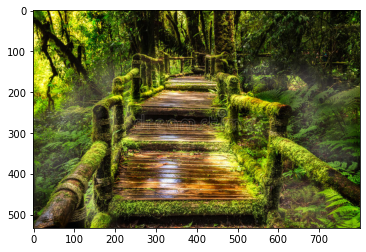

In [18]:

img=read_file('nature.jpg')

In [19]:
# edge masking

In [20]:
def edge_mask(img,line_size,blur_value):
    #input : input of imgae
    #output : edges of the image
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

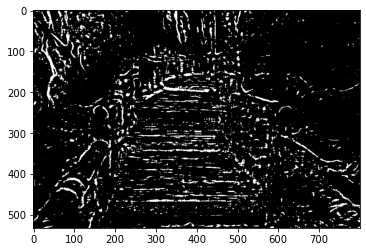

In [21]:
line_size,blur_value = 9,9
edges = edge_mask(img,line_size,blur_value)
plt.imshow(edges, cmap='binary')
plt.show()

Reduce the color Palette

In [22]:
def color_quantization(img,k):
    # transform the image
    data = np.float32(img).reshape((-1,3))
    #determine criteria
    
    criteria =(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    
    # implementing k-means
    ret , label,center =cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

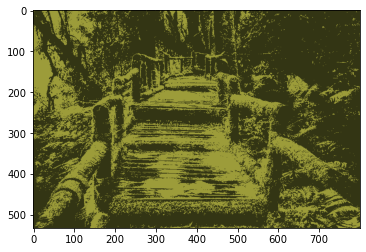

In [23]:

img = color_quantization(img,k=2)
plt.imshow(img)
plt.show()

# Reduce the Noise

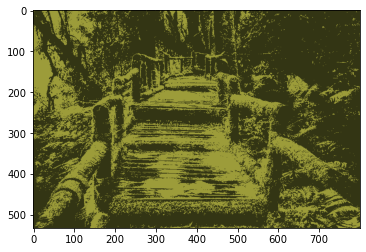

In [24]:
blurred = cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(img)
plt.show()

In [27]:
def cartoon():
    c= cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()

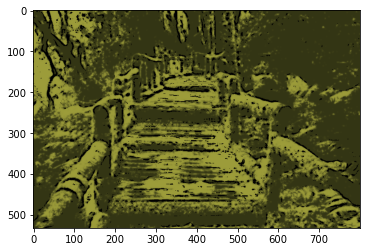

In [28]:
cartoon()